In [ ]:
# Run this cell first, then restart the runtime and don't run this cell again.
!pip install setuptools-rust --quiet

In [ ]:
# Install Whisper large model
!pip install git+https://github.com/openai/whisper.git --quiet 
!sudo apt-get -qq update && sudo apt-get -qq install ffmpeg 
import whisper
model = whisper.load_model("large")

In [ ]:
# Get list of episode mp3
!pip install feedparser --quiet
import feedparser
podcast_rss_url = 'https://thecsspodcast.libsyn.com/rss'
podcast_feed = feedparser.parse(podcast_rss_url)
podcast_audio_urls = list()
podcast_titles = list()
podcast_slugs = list()
for entry in reversed(podcast_feed.entries):
    podcast_audio_urls.append(entry['links'][1]['href'].split('?')[0])
    podcast_titles.append(entry['title'])
    podcast_slugs.append(entry['link'].split('/')[3])

In [ ]:
# latest to oldest
output_file = open("meta.json", "a")
output_file.write("{\n")

for entry in podcast_feed.entries[:-1]:
    output_file.write('"' + entry['link'].split('/')[3] + '": "' + entry['title'] + '",\n') 

output_file.write('"' + podcast_feed.entries[-1]['link'].split('/')[3] + '": "' + podcast_feed.entries[-1]['title'] + '"\n')
output_file.write("}")
output_file.close()

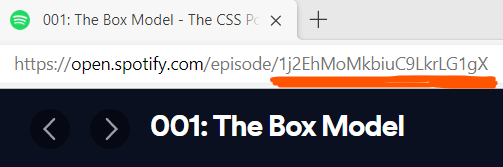  
This is what I call an **episode_id**

In [ ]:
# oldest to latest
spotify_episode_ids = [
 '1j2EhMoMkbiuC9LkrLG1gX',
 '4hv6ogNtJZtvxKcQ67Ctpn',
 '2I3gJ9AFUi08Sm9CV7wydO',
 '698XEvD2VUmg4iVZEZqL7I',
 '7q4lpdJOIYaUTNMwjUvRxP',
 '5WcgqRbtXg6j6N9GEO96ve',
 '2wdKgTolHCMXS1YD24WMHH',
 '68JoJ3go7Bat0pnyv4jIlT',
 '3bsih2GEdptNtvMwlfcAMS',
 '6L7jidxKmTcF1eo915Y9ZZ',
 '0ctemNh38ZZIB8eLp9GdxG',
 '1M8LFVdO5iH3CpXAsTZOKx',
 '1HqJd2WNsWwF5N4kdWmYUD',
 '1woLO9AzhL7AttbCsaL1o7',
 '4oQ23OfgIMUsrJ4iuV9mG5',
 '0XyDsL1T9k5vBvwyjfr7JH',
 '0uKRf077iHI4aWPjIHpeey',
 '4tNfpDEZg8iAkGHUlrLRsc',
 '1Z0fKRilywVPqSNzlk8X97',
 '0TdScjKYIBNRnT9pSWKnn2',
 '1JugZhO82tJa8c1LFpR6il',
 '6IbuahSZJj7e05NmjyhiYW',
 '4E2B76Crmivzr9788HaM2J',
 '3OBjg2LukmwWTKzs4fA0AJ',
 '6cKb0tJzj5pgIJtPRq6pws',
 '2uE2ZqYdQekeqOATayKZNQ',
 '72Wv3rzzW3pND9w7RIuWrp',
 '1YlWP1lbFe2PSkHeByRvKK',
 '4vODG8jxzIDxECi63fzZTC',
 '285lGk0afcLFyOid6SEJU3',
 '1Y7NXhNzM5oT0Qbcrq8pwn',
 '3SpJgBhxIGsIBKvvhtnjr1',
 '7C4WFzNYXzFt7JRhtlX9Qd',
 '3piht4fX3ZtNe59NOEW9Ou',
 '6m1VpH4sIiBksEsaYcm5vR',
 '3ZnB2eIM4MRn3RR7rbWjf3',
 '0A6JQDnxwTG9wRaSz2rCEU',
 '0QWnb3VbNTRPWiAEc3gUYA',
 '5EhdwEHCBeg0qB5ilqf5Ys',
 '2lOl1RG3deF4JbuJQfQffd',
 '2lOl1RG3deF4JbuJQfQffd',
 '02VO53lNDAYj46zIlbeWQx',
 '67Cm2VoDbtAmOMLlf8g5Z1',
 '4HyziUjpMt5HZ4mbVvBlDp',
 '4o1ateFDezB5lvAgDHC1tf',
 '2NUzPqu3NcA8OkxdYJkiU4',
 '3WiLji83Iz2kuKuQGxJ6DY',
 '5x85WPhwm9GY2fQVoT7IoT',
 '3gpPwzRw80Cj7NiBNIlE2I',
 '731Ql5cmL5n3gPvx7IQth7',
 '0XTZOuRuQ5nSxTAUJ9H7AY',
 '0pYXkLEaj1HiBxEjTHHHYJ',
 '7fsblWgyksTFmCfGHIgpB9',
 '7vE7V3JZqRXs4XP24KkhF1',
 '4L5wmY6jprq5Zz5gIAWnz2',
 '2orzml5RcWYVgUDLkVgwnQ',
 '6UAQcFJFc7ViNKlQe4wP0r',
 '3VOAXo6EZ7THJxm81gVDJZ',
 '3iAiAYXHG4qztu5FDUSGOm',
 '33v1CKWKsZbXCSWTcLzLiF']

In [ ]:
# This helps convert the timestamps to human-readable format
import datetime

def transcribe(episode_num):
    print("Processing episode", episode_num)
    result = model.transcribe(podcast_audio_urls[episode_num - 1])

    output_file = open(str(podcast_slugs[episode_num - 1]) + ".mdx", "a")
    output_file.write("# " + podcast_titles[episode_num - 1] + "\n")
    output_file.write("\n")
    output_file.write('<div>\n')
    output_file.write('\t<audio\n')
    output_file.write("\t\tstyle={{ width: 100 + '%', marginTop: 1 + 'rem' }}\n")
    output_file.write('\t\tcontrols\n')
    output_file.write('\t\tsrc="' + str(podcast_audio_urls[i - 1]) + '"\n')
    output_file.write('\t/>\n')
    output_file.write('</div>\n')
    output_file.write("\n")
    output_file.write("| Timestamp | Transcript |" + "\n")
    output_file.write("|---|---|" + "\n")

    for segment in result['segments']:
        output_file.write("| " + "[" + str(datetime.timedelta(seconds=round(segment['start']))) + "]" + "(https://open.spotify.com/episode/" + spotify_episode_ids[episode_num - 1] + "?&t=" + str(round(segment['start'], 3)) + ")" + " | " + segment['text'] + " |" + "\n")

    output_file.close()

In [ ]:
for i in range(1, len(podcast_audio_urls) + 1):
    transcribe(i)